In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

import glob
import cv2
import random

import tensorflow as tf

#print versions
print('tensorflow version',tf.__version__)

tensorflow version 2.4.1


In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 100
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_training_data('C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/train')
test = get_training_data('C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/test')
val = get_training_data('C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/val')

<ipython-input-2-09e907f57790>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

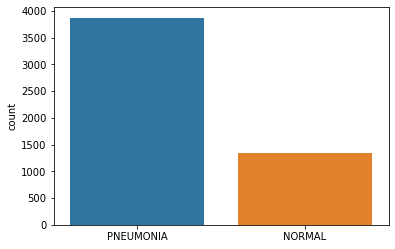

In [7]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("PNEUMONIA")
    else:
        l.append("NORMAL")
        
sns.countplot(l)

In [8]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

In [9]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

In [11]:
IMG_SIZE = 100
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), shuffle=True)
scores = model.evaluate(X_test, y_test)

model.save("cnn.model")

Epoch 1/50
163/163 [==============================] - 44s 265ms/step - loss: 0.4625 - accuracy: 0.7913 - val_loss: 0.6121 - val_accuracy: 0.6875
Epoch 2/50
163/163 [==============================] - 45s 277ms/step - loss: 0.1155 - accuracy: 0.9574 - val_loss: 0.3322 - val_accuracy: 0.7500
Epoch 3/50
163/163 [==============================] - 45s 277ms/step - loss: 0.0921 - accuracy: 0.9663 - val_loss: 0.1235 - val_accuracy: 1.0000
Epoch 4/50
163/163 [==============================] - 44s 272ms/step - loss: 0.0747 - accuracy: 0.9762 - val_loss: 0.1963 - val_accuracy: 0.9375
Epoch 5/50
163/163 [==============================] - 47s 286ms/step - loss: 0.0592 - accuracy: 0.9769 - val_loss: 0.3140 - val_accuracy: 0.8125
Epoch 6/50
163/163 [==============================] - 44s 269ms/step - loss: 0.0677 - accuracy: 0.9774 - val_loss: 0.0321 - val_accuracy: 1.0000
Epoch 7/50
163/163 [==============================] - 45s 275ms/step - loss: 0.0498 - accuracy: 0.9832 - val_loss: 0.0705 - val_ac

In [34]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val), shuffle=True)
scores = model.evaluate(X_test, y_test)

model.save("cnn.model")

20/20 [==============================] - 1s 74ms/step - loss: 3.5942 - accuracy: 0.7628
INFO:tensorflow:Assets written to: cnn.model\assets


In [35]:
# scores
print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))

Test loss 3.594226837158203
Test accuracy 0.7628205418586731


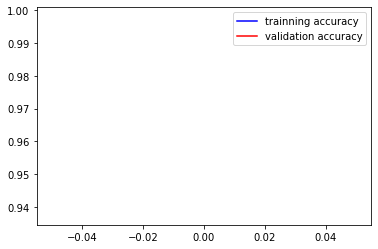

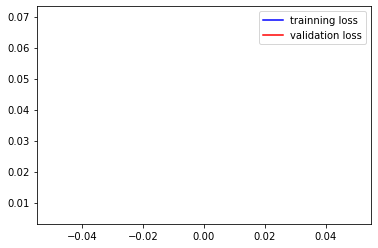

In [36]:

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [37]:

prediction = model.predict_classes(X_test)
prediction = prediction.reshape(1, -1)[0]
prediction[:15]

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:

correct = np.nonzero(prediction == y_test)[0]
incorrect = np.nonzero(prediction != y_test)[0]

In [38]:
predictions = model.predict_classes(X_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
cm = confusion_matrix(y_test,predictions)
cm

array([[388,   2],
       [146,  88]], dtype=int64)